# Cat vs Non-cat classification using Tensorflow

The imports. 

In [2]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import time
import scipy
from PIL import Image
from scipy import ndimage

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


The following few cells are for loading the dataset and previewing some images. 

In [11]:
def load_dataset():
    !wget 'https://raw.githubusercontent.com/CNN-ADF/Task2019/master/resources/catvnoncat.h5'
    dataset = h5py.File('catvnoncat.h5', "r")

    train_x_orig = np.array(dataset["X_train"][:]) # your train set features
    train_y = np.array(dataset["y_train"][:]) # your train set labels
    test_x_orig = np.array(dataset["X_val"][:]) # your test set features
    test_y = np.array(dataset["y_val"][:]) # your test set labels
    classes = np.array(dataset["classes"][:]) # the list of classes
    
    return train_x_orig, train_y, test_x_orig, test_y, classes

In [12]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_dataset()

OSError: Unable to open file (unable to open file: name = 'catvnoncat.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

y = 1. It's a cat picture.


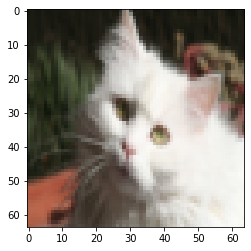

In [38]:
# Example of a picture
index = 102
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[index,0]) + ". It's a " + classes[train_y[index,0]].decode("utf-8") +  " picture.")

## Tensorflow: beginning

In [39]:
import tensorflow as tf

One-hot representation of the labels. Since there are two labels, each label will be converted to either (1, 0) or (0, 1). 

In [40]:
train_y_cat = tf.keras.utils.to_categorical(train_y, num_classes=2)
test_y_cat = tf.keras.utils.to_categorical(test_y, num_classes=2)

In [7]:
tf.keras.backend.clear_session()

In [41]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(64, 64, 3)),
  tf.keras.layers.Dense(32, activation='relu'),
  #tf.keras.layers.Dropout(0.2),
  #tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)),
  #tf.keras.layers.BatchNormalization(center=True, scale=True),
  #tf.keras.layers.Dense(16, activation='relu'),
  #tf.keras.layers.BatchNormalization(center=True, scale=True),
  #tf.keras.layers.Dense(1, activation='sigmoid')
  tf.keras.layers.Dense(2, activation='softmax')
])

In [42]:
sgd = tf.keras.optimizers.SGD(learning_rate=0.001)
bce = tf.keras.losses.BinaryCrossentropy(from_logits=False)
cce = tf.keras.losses.CategoricalCrossentropy()

model.compile(optimizer='adam',
              loss=cce,
              #loss=bce,
              metrics=['accuracy'])

In [43]:
#Clear output
import IPython
import time
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output()

Epoch 1/20
7/7 [==============================] - 1s 37ms/step - loss: 622.8779 - accuracy: 0.4749 - val_loss: 930.0380 - val_accuracy: 0.3400
Epoch 2/20
7/7 [==============================] - 0s 12ms/step - loss: 465.4879 - accuracy: 0.5038 - val_loss: 390.1638 - val_accuracy: 0.3200
Epoch 3/20
7/7 [==============================] - 0s 13ms/step - loss: 181.9125 - accuracy: 0.5998 - val_loss: 380.4880 - val_accuracy: 0.3200
Epoch 4/20
7/7 [==============================] - 0s 12ms/step - loss: 152.8952 - accuracy: 0.6343 - val_loss: 677.3164 - val_accuracy: 0.3400
Epoch 5/20
7/7 [==============================] - 0s 13ms/step - loss: 232.7503 - accuracy: 0.6781 - val_loss: 442.6929 - val_accuracy: 0.3400
Epoch 6/20
7/7 [==============================] - 0s 11ms/step - loss: 212.4373 - accuracy: 0.6892 - val_loss: 129.9834 - val_accuracy: 0.5000
Epoch 7/20
7/7 [==============================] - 0s 12ms/step - loss: 51.4996 - accuracy: 0.7761 - val_loss: 287.4413 - val_accuracy: 0.3600


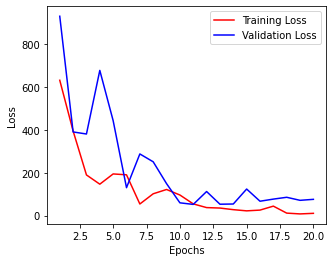

In [44]:
tf.keras.backend.clear_session()
#tf.random.set_seed(1)

epochs = 20

trained_model = model.fit(train_x_orig, train_y_cat, validation_data=(test_x_orig, test_y_cat), epochs=epochs, batch_size=32,verbose=1)

#trained_model = model.fit(train_x_orig, train_y, validation_data=(test_x_orig, test_y), validation_batch_size=50, batch_size=32, epochs=epochs)

# Print the learning curve
plt.plot(range(1, epochs+1), trained_model.history['loss'] , 'r', range(1, epochs+1), trained_model.history['val_loss'], 'b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
_ = plt.legend(['Training Loss', 'Validation Loss'])

Max Accuracy Reached: 80.00 %


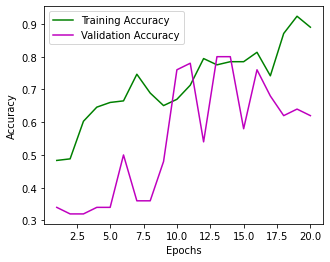

In [45]:
# Print the Accuracy curve
plt.plot(range(1, epochs+1), trained_model.history['accuracy'] , 'g', range(1, epochs+1), trained_model.history['val_accuracy'], 'm')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
print('Max Accuracy Reached: {0:0.2f} %'.format((max(trained_model.history['val_accuracy']) * 100)) )

## Reference: 

The code for the plots and another sophisticated model can be found here. 

https://github.com/codejack-CR/CatvNonCat/blob/main/CatvNotCatClassifier.ipynb